# Lecture 17 - Machine Learning - The In-Distribution Assumption; Generalization

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.DataFrame({
  "Income": [0.49, 0.18, 0.31, 0.40, 0.24],
  "CrimeRate": [0.09, 0.45, 0.23, 0.19, 0.48]
})


#### Announcements:
* Quiz 4 - the multiple-answer numpy question has been regraded.
* Quiz 5 grading complete.

#### Goals:
* Understand the near-universal assumption of machine learning models: **unseen data is drawn from the same distribution as the training dataset**, and the implications of this assumption.
* Know how **true risk** differs from **empirical risk**.
* Know how to define **bias**, **variance**, **irreducible error**.
* Be able to identify the most common causes of the above types of error, and explain how they relate to generalization, risk, overfitting, underfitting.
* Know why and how to create separate **validation and test sets** to evaluate a model

## Machine Learning: Foundational Assumptions

### The In-Distribution Assumption

Generally: **unseen data is drawn from the same distrubtion as your dataset.**

*Consequence:* We don't assume correlation is causation, but we do assume that observed correlations will hold in unseen data.

### Model-Specific Assumptions
Specific model classes make additional assumptions. For example, **linear regression** assumes:
* Columns are linearly independent (i.e., one column can't be directly computed from another
* Data is **homoscedastic**, i.e., the following won't happen:
  ![](https://upload.wikimedia.org/wikipedia/commons/a/a5/Heteroscedasticity.png)

## Big Idea: Generalization



**Generalization** is the ability of a model to perform well on **unseen** data (i.e., data that was not in the training set).
* As discussed above: we're usually hoping to perform well on unseen data that is drawn from the **same** distribution as the training set.

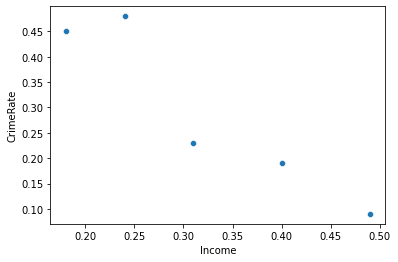

In [4]:
sns.scatterplot(data=df,x="Income",y="CrimeRate")

Consider the following possible model classes:
* Linear functions (degree-1 polynomials)
* Quadratic functions (degree-2 polynomials)
* Degree-10 polynomials

**Question 1**: Which of these chioces of model class will result in the best (lowest) **empirical risk** $\hat{R}(h; \mathcal{X})$?

**Question 2**: Which of these will result in the best (lowest) **empirical risk** on another batch of data $\mathcal{X}'$ drawn from the same distribution as $\mathcal{X}$? 
* In other words, which of these will **generalize** best?

### Empirical Risk vs True Risk
Let's formalize the above distinction.

What we *truly* care about is a quantity known as (true) *risk*: $R(h; {\cal X})$.
- True risk is the expected loss "in the wild"
- Depends on a probability distribution that we don't know: $P(x,y)$ -- the joint distribution of inputs and outputs.
  - If we knew $P$, there's nothing left to "learn": let $\hat{y} = \arg\max_y P(y | x)$.


### Where does risk come from?
There are three contributors to risk:
1. Bias (not the same bias as the $b$ in our linear model)
2. Variance
3. Irrereducible error

To understand bias and variance, we need to consider hypothetical:
  - There is some underlying distribution/source generating input-output pairs
    - The probabily of a pair is denoted $P(x,y)$
    - The probability of the output given the input is denoted $P(y|x)$
    - Why a distribution? Because the same input (x) can have different ouputs (y).
      - Example: x contains home features: square feet, # bedrooms. Many houses are 2400 square feet with 3 bedrooms, and they're not all priced the same.
  - for i in 1..K
    - Get a random training set with $N$ points sampled from $P$
    - Train a model on that training set, call that $h_i(x)$.
  - Define $\bar{h}(x) = \frac{1}{K} \sum_{i=1}^K h_i(x)$

#### Bias
- The **bias** of the training process is how far $\bar{h}(x)$ is from the mean of $P(y|x)$.
- High bias implies something is keeping you from capturing true behavior of the source.
- Most common cause of bias? The model class is too restrictive aka too simple aka not powerful enough aka not expressive enough.
  - E.g., if the true relationship is quadratic, using linear functions will have high bias.
- Training processes with high bias are prone to **underfitting**.
  - Underfitting is when you fail to capture important phenomena in the input-output relationship, leading to higher risk.

#### Variance
- The **variance** of a training process is the variance of the individual models $h_i(x)$; that is, how spread they are around $\bar{h}(x)$.
- This is a problem, because we only have one $h_i$, not $\bar{h}(x)$, so our model might be way off even if the average is good.
- Most common causes of variance?
  - Too powerful/expressive of a model, which is capable of **overfitting** the the training. Overfitting means memorizing or being overly influenced by noise in the training set.
  - Small training set sizes ($N$).
  - Higher irreducible error (noisier training set).

#### Irreducible Error
- Even if you have a zero bias, zero variance training process, you then predict the mean $P(y|x)$, which is almost never right.
  - Because the truth is non-deterministic.
  - This error that remains is the *irreducible error*.
- Source of irreducible error?
  - Not having enough, or enough relevant features in $x$.
- Note: this error is only irreducible for a given feature set (the information in $x$). *If you change the problem to include more features, you can reduce irreducible error.*

### Worksheet: Problems 1 - 4

### Identifying the model with the best generalization (i.e. lowest true risk)
- Answer: hold out a *test set*. Use this to estimate (true) risk.
- So we need a training set and a test set. But that is not enough in practice. Why?
  - The more times you see results on the test set, the less representative it is as an estimate for $R$.
  - Example: 10k random "models"
- We need a training set, a test set, and ideally a *development* or *validation* set.
  - This set is a surrogate for the test set.